# Data Cleaning & Preprocessing for Receivers Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv('../data/raw/receivers_data.csv')

## Remove extra spaces

In [3]:
df.columns = df.columns.str.strip()

## Strip spaces in string columns

In [4]:
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())

## Standardize casing

In [5]:
df['Name'] = df['Name'].str.title()
df['Type'] = df['Type'].str.title()
df['City'] = df['City'].str.title()

## Convert Receiver_ID to integer

In [6]:
df['Receiver_ID'] = pd.to_numeric(df['Receiver_ID'], errors='coerce').astype('Int64')

## Drop rows missing essential fields

In [7]:
df = df.dropna(subset=['Receiver_ID', 'Name', 'Type', 'City', 'Contact'])

## Remove duplicate Receiver_IDs

In [8]:
df = df.drop_duplicates(subset=['Receiver_ID'])

## Normalize contact format

In [9]:
df['Contact'] = df['Contact'].str.replace(r'\s+', '', regex=True)  
df['Contact'] = df['Contact'].str.replace(r'[^\d\+\-x]', '', regex=True)

# Feature Engineering

## Encode type as numeric

In [10]:
df['Type_Code'] = df['Type'].astype('category').cat.codes

## City name length

In [11]:
df['City_Name_Length'] = df['City'].apply(len)

## Contact number length

In [12]:
df['Contact_Length'] = df['Contact'].apply(len)

# EDA Summaries

In [13]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Receiver_ID       1000 non-null   Int64 
 1   Name              1000 non-null   object
 2   Type              1000 non-null   object
 3   City              1000 non-null   object
 4   Contact           1000 non-null   object
 5   Type_Code         1000 non-null   int8  
 6   City_Name_Length  1000 non-null   int64 
 7   Contact_Length    1000 non-null   int64 
dtypes: Int64(1), int64(2), int8(1), object(4)
memory usage: 56.8+ KB
None


In [14]:
print("\n--- Receiver Type Counts ---")
print(df['Type'].value_counts())


--- Receiver Type Counts ---
Type
Ngo           274
Charity       263
Shelter       246
Individual    217
Name: count, dtype: int64


In [15]:
print("\n--- Top Cities ---")
print(df['City'].value_counts())


--- Top Cities ---
City
New Christopher    3
North Christina    2
Emilymouth         2
Williamsfort       2
Spencermouth       2
                  ..
Lanechester        1
New Steven         1
South Sandra       1
Lake Jeffery       1
East Sharimouth    1
Name: count, Length: 966, dtype: int64


# Visualizations

## Receiver type distribution

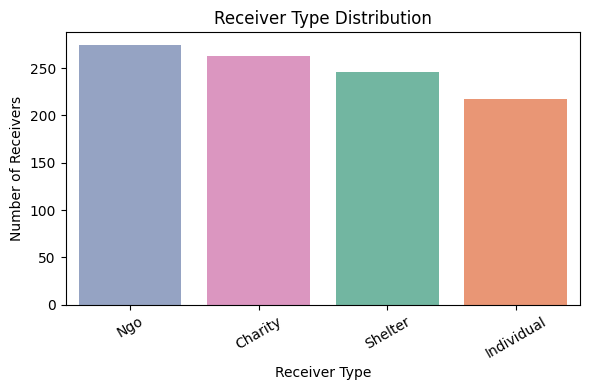

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index, hue = 'Type', legend = False, palette='Set2')
plt.title("Receiver Type Distribution")
plt.xlabel("Receiver Type")
plt.ylabel("Number of Receivers")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("../reports/Visualizations/Receivers_Data/Receiver Type Distribution.png")
plt.show()

## Receivers by city

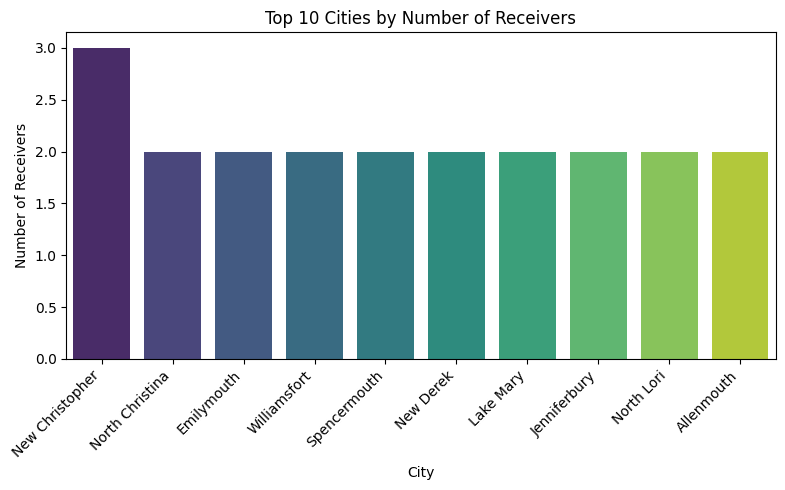

In [25]:
top_cities = df['City'].value_counts().nlargest(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.index, y=top_cities.values,hue = top_cities.index, legend=False, palette='viridis')
plt.title("Top 10 Cities by Number of Receivers")
plt.xlabel("City")
plt.ylabel("Number of Receivers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../reports/Visualizations/Receivers_Data/Top 10 Cities by Number of Receivers.png")
plt.show()


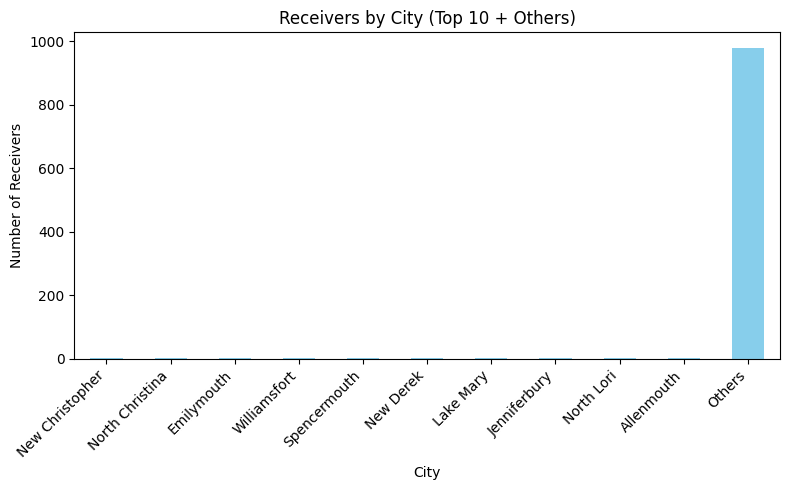

In [26]:
city_counts = df['City'].value_counts()
top_n = 10
city_counts_top = city_counts[:top_n]
city_counts_top['Others'] = city_counts[top_n:].sum()

plt.figure(figsize=(8,5))
city_counts_top.plot(kind='bar', color='skyblue')
plt.title("Receivers by City (Top 10 + Others)")
plt.xlabel("City")
plt.ylabel("Number of Receivers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../reports/Visualizations/Receivers_Data/Receivers by City (Top 10 + Others).png")
plt.show()

## Contact length distribution

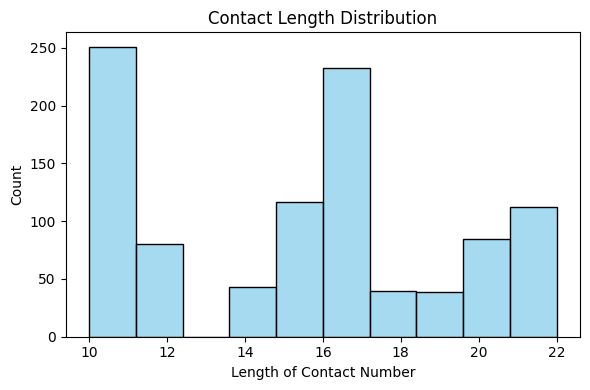

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Contact_Length'], bins=10, kde=False, color='skyblue')
plt.title("Contact Length Distribution")
plt.xlabel("Length of Contact Number")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../reports/Visualizations/Receivers_Data/Contact Length Distribution.png")
plt.show()

# Save cleaned dataset

In [27]:
df.to_csv("../data/processed/receivers_data_clean.csv", index=False)
print("\nCleaned receivers dataset saved as 'receivers_data_clean.csv'")


Cleaned receivers dataset saved as 'receivers_data_clean.csv'
